This notebook contains
- Exploring the users_data_final.pkl data
- Feature Selection

In [1]:
# import libaries we will work with today
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Exploring the Data

In [2]:
# read the data
users_data = pd.read_pickle("../data/users_data_final.pkl")


In [3]:
# preview the data

users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [4]:
# check the shape of the data

users_data.shape

(45209, 19)

In [5]:
print("# of rows:", users_data.shape[0])
print("# of columns:", users_data.shape[1])


# of rows: 45209
# of columns: 19


In [6]:
# count how many unique users we have

len(users_data.user_id.unique())

# this should be the same as the number of rows, otherwise we have duplicates

45209

In [7]:
# check the structure/summary of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [8]:
# if we want to identify all the variables with data type object

categorical_cols = list(users_data.select_dtypes(['object']).columns)
print(categorical_cols)

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']


In [9]:
# if we want to count all the variables with data type object

len(categorical_cols)

7

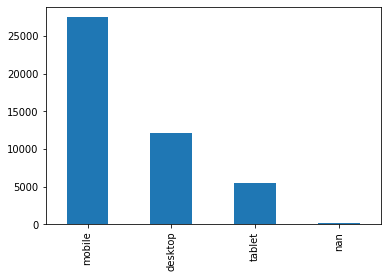

In [10]:
# distribution of a variable with data type object for e.g. device

users_data.device.value_counts(dropna = False).plot(kind = 'bar');

# signs of missing data

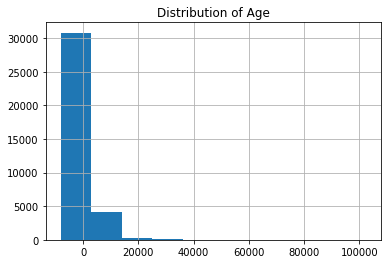

In [11]:
# distribution of a variable with a numerical data type for e.g. age

users_data.total_amount_usd.hist()
plt.title("Distribution of Age");

# what is the distribution of this variable?

In [12]:
# check the summary stats for one numerical var
# you can replace age with any numerical column

users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [13]:
# generate summary stats for all the numerical data

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# identifying correlations between variables
# ranges between 1 and -1. The closer to 1/-1 the stronger the correlation.

corr = users_data.corr()
corr

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


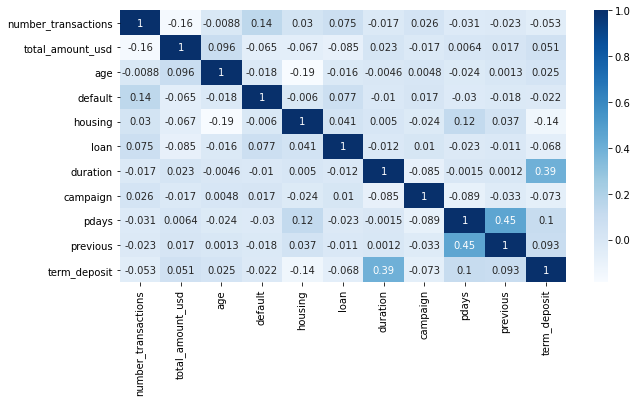

In [15]:
# visualise the correlations

plt.rcParams["figure.figsize"] = (10,5)
sns.heatmap(corr, cmap="Blues", annot = True);


In [17]:
# identify missing values

users_data.isnull().sum()

# the numbers indicate how many missing values the variable has

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [ ]:
# identify missing values

users_data.isnull().mean()

# the numbers indicates how many missing values the variable has

- There are 7 variables with data type objects that we need to encode in future lectures
- Since we have no highly correlated variables we do not need to drop any of the features
- There are 8 variables with missing values and 1 variable that has more than 80% missing data

### Feature Selection

In [ ]:
# drop columns with more than 80% missing data

users_data_cleaned = users_data.drop(['poutcome'], axis = 1)

In [ ]:
# check if dropped

list(users_data_cleaned)

In [ ]:
print(users_data.shape)
print(users_data_cleaned.shape)

In [ ]:
# drop the date time column, as requires further processing

users_data_cleaned.drop(['date_joined'], axis = 1, inplace = True)